In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:95% !important; }</style>"))

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib.dates as md

# Sunspot DATA

## https://www.sidc.be/SILSO/datafiles#total

## https://www.sidc.be/SILSO/infosnmtot

In [103]:
dSN_m_colunas = ['Year', 'Month', 'Decimal date', 'Monthly total sunspot number', 'Standard deviation', 'Number of observations', 'Definitive/provisional indicator']

In [104]:
dSN_m = pd.read_csv('SN_m_tot_V2.0.txt', sep='\s+', names = dSN_m_colunas, header = None, usecols = dSN_m_colunas)

In [105]:
dSN_m

,Year,Month,Decimal date,Monthly total sunspot number,Standard deviation,Number of observations,Definitive/provisional indicator
0,1749,1,1749.042,96.7,-1.0,-1,NaN
1,1749,2,1749.123,104.3,-1.0,-1,NaN
2,1749,3,1749.204,116.7,-1.0,-1,NaN
3,1749,4,1749.288,92.8,-1.0,-1,NaN
4,1749,5,1749.371,141.7,-1.0,-1,NaN
...,...,...,...,...,...,...,...
3303,2024,4,2024.288,136.5,22.3,973,*
3304,2024,5,2024.373,171.7,23.8,1058,*
3305,2024,6,2024.455,164.2,21.4,1048,*
3306,2024,7,2024.540,196.5,23.3,1044,*


### 1996/11 to 2024/05

In [200]:
dSN_m_1996to2024 = dSN_m.loc[(dSN_m['Decimal date']>=1996.042) & (dSN_m['Decimal date']<= 2024.373)]
dSN_m_1996to2024

,Year,Month,Decimal date,Monthly total sunspot number,Standard deviation,Number of observations,Definitive/provisional indicator
2964,1996,1,1996.042,13.3,3.4,535,NaN
2965,1996,2,1996.124,7.7,3.4,532,NaN
2966,1996,3,1996.206,12.6,3.1,621,NaN
2967,1996,4,1996.290,6.8,2.5,678,NaN
2968,1996,5,1996.373,7.6,3.1,676,NaN
...,...,...,...,...,...,...,...
3300,2024,1,2024.042,126.0,19.8,890,NaN
3301,2024,2,2024.124,123.0,21.7,806,NaN
3302,2024,3,2024.206,103.7,16.6,1071,NaN
3303,2024,4,2024.288,136.5,22.3,973,*


In [201]:
year   = md.YearLocator()   
month  = md.MonthLocator()  

formatter = md.DateFormatter('%Y') #'%H:%M'

In [202]:
#num = len(dSN_m_1996to2024)
Year_Month = [md.datestr2num(str(dSN_m_1996to2024.iloc[i]['Year']) +'/'+ str(dSN_m_1996to2024.iloc[i]['Month'])) for i in range(len(dSN_m_1996to2024))]

dSN_YM1 =  md.datestr2num(str(dSN_m_1996to2024.iloc[0]['Year']) +'/'+ str(dSN_m_1996to2024.iloc[0]['Month']))
dSN_YM2 =  md.datestr2num(str(dSN_m_1996to2024.iloc[-1]['Year']) +'/'+ str(dSN_m_1996to2024.iloc[-1]['Month']))

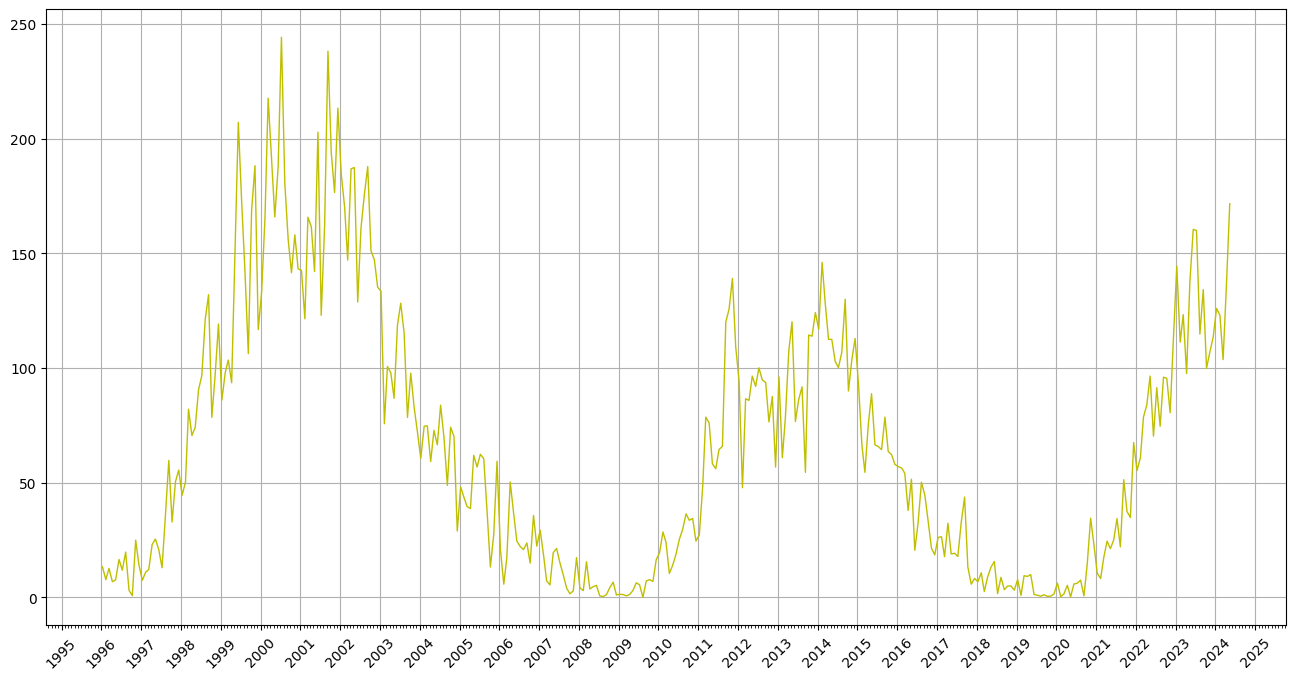

In [203]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(Year_Month, dSN_m_1996to2024['Monthly total sunspot number'], lw = 1, color = 'y')


ax.xaxis.set_major_locator(year) 
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(month)

ax.tick_params(axis='x', rotation=45)

ax.grid()

# CME DATA

In [164]:
Header = ["Date", "Time", "Central PA", "Width", "Linear Speed", "I","F", "20R", "Acel", "Mass", "KE", "MPA", "Remarks"]

In [165]:
# read text file into pandas DataFrame
df = pd.read_csv("LASCO_CME_ATT20240808.txt", sep = '\t',skiprows = 3, header= None)

In [166]:
df

,0
0,1996/01/11 00:14:36 267 18 499 ...
1,1996/01/13 22:08:30 265 16 290 ...
2,1996/01/15 07:01:10 262 43 525 ...
3,1996/01/22 03:11:01 105 37 267 ...
4,1996/01/26 09:16:19 90 27 262 ...
...,...
39117,2024/05/30 09:12:10 85 64 665 ...
39118,2024/05/30 14:12:05 239 52 379 ...
39119,2024/05/30 20:12:06 86 55 406 ...
39120,2024/05/30 20:56:54 209 106 458 ...


In [167]:
new = df[0].str.split(" +", n = 12, expand = True)

In [168]:
new

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1996/01/11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996/01/13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996/01/15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996/01/22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024/05/30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,
39118,2024/05/30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event
39119,2024/05/30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event
39120,2024/05/30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,


In [169]:
new.columns = Header 

In [170]:
new

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996/01/13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996/01/15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996/01/22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024/05/30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,
39118,2024/05/30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event
39119,2024/05/30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event
39120,2024/05/30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,


In [171]:
contagem_CMEs = new['Date'].value_counts().sort_index()
contagem_CMEs

Date
1996/01/11    1
1996/01/13    1
1996/01/15    1
1996/01/22    1
1996/01/26    1
             ..
2024/05/27    5
2024/05/28    5
2024/05/29    5
2024/05/30    5
2024/05/31    1
Name: count, Length: 9375, dtype: int64

In [172]:
contagem_CMEs.index

Index(['1996/01/11', '1996/01/13', '1996/01/15', '1996/01/22', '1996/01/26',
       '1996/01/30', '1996/01/31', '1996/02/01', '1996/02/02', '1996/02/03',
       ...
       '2024/05/22', '2024/05/23', '2024/05/24', '2024/05/25', '2024/05/26',
       '2024/05/27', '2024/05/28', '2024/05/29', '2024/05/30', '2024/05/31'],
      dtype='object', name='Date', length=9375)

In [173]:
contagem_CMEs_Date = contagem_CMEs.index

In [174]:
date_num = md.datestr2num(contagem_CMEs_Date)

from scipy.interpolate import interp1d

interpolacao = interp1d(date_num, contagem_CMEs, kind='cubic')


x_novo = np.linspace(date_num.min(), date_num.max(), 500000)
y_novo = interpolacao(x_novo)

In [175]:
month = md.MonthLocator(interval=2)   
Year  = md.YearLocator(2)  

formatter = md.DateFormatter('%Y') #'%H:%M'

In [176]:
IT1 =  md.datestr2num('1996/01/01/00:00:00')
IT2 =  md.datestr2num('2024/06/01')

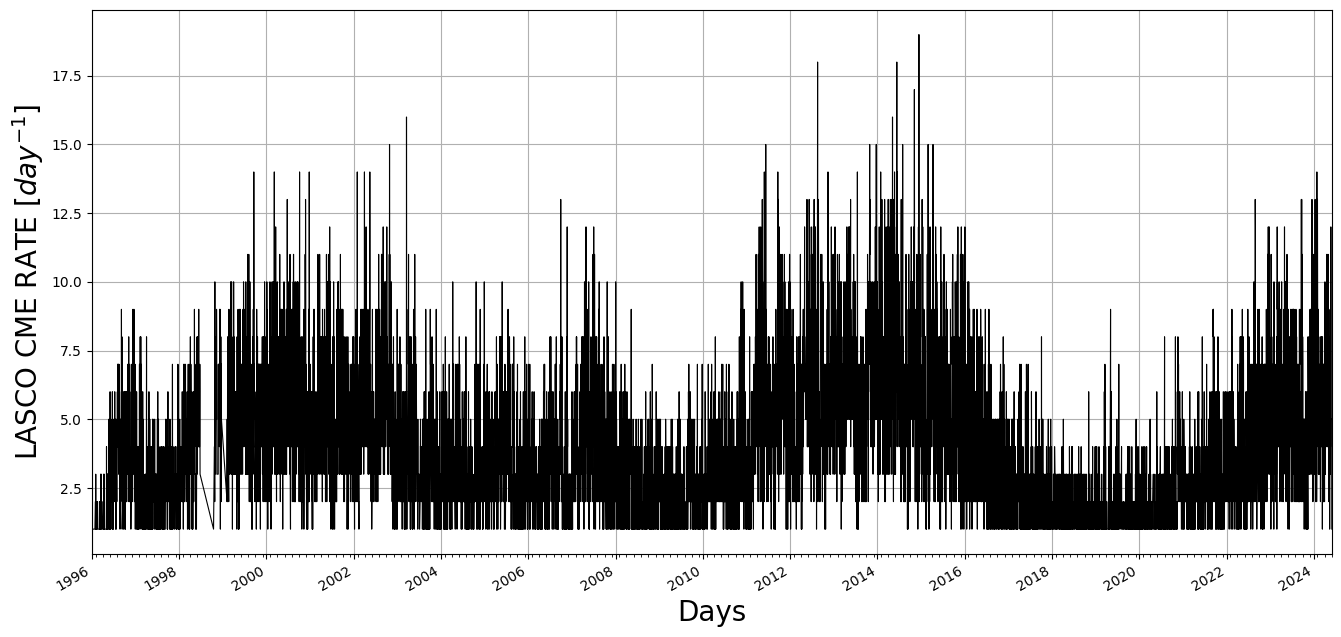

In [177]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(date_num , contagem_CMEs, lw=0.8, color = 'k')

#ax.plot(x_novo , y_novo, lw=0.8, color = 'r')
ax.set_ylabel('LASCO CME RATE [$day^{-1}$]', fontsize=20)
ax.set_xlabel('Days',fontsize=20)

ax.xaxis.set_major_locator(Year) 
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(month) 
#plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

ax.set_xlim(IT1, IT2)


ax.grid()

#plt.savefig('CME_FrequenciaTotal_1.png', dpi=300, format='png', bbox_inches='tight')

In [178]:
Date_new = new.copy(deep=True)
Date_new

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996/01/13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996/01/15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996/01/22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024/05/30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,
39118,2024/05/30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event
39119,2024/05/30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event
39120,2024/05/30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,


In [179]:
Date_new['Date'] = pd.to_datetime(new['Date'])
Date_new 

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
0,1996-01-11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996-01-13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996-01-15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996-01-22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996-01-26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024-05-30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,
39118,2024-05-30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event
39119,2024-05-30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event
39120,2024-05-30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,


In [180]:
Date_new['mes'] = Date_new['Date'].dt.to_period('M')

In [181]:
Date_new

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks,mes
0,1996-01-11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3,1996-01
1,1996-01-13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3,1996-01
2,1996-01-15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3,1996-01
3,1996-01-22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3,1996-01
4,1996-01-26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3,1996-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024-05-30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,,2024-05
39118,2024-05-30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event,2024-05
39119,2024-05-30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event,2024-05
39120,2024-05-30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,,2024-05


In [182]:
quantidade_por_mes = Date_new.groupby('mes').count()
quantidade_por_mes

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
mes,,,,,,,,,,,,,
1996-01,9,9,9,9,9,9,9,9,9,9,9,9,9
1996-02,15,15,15,15,15,15,15,15,15,15,15,15,15
1996-03,27,27,27,27,27,27,27,27,27,27,27,27,27
1996-04,34,34,34,34,34,34,34,34,34,34,34,34,34
1996-05,54,54,54,54,54,54,54,54,54,54,54,54,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01,193,193,193,193,193,193,193,193,193,193,193,193,193
2024-02,169,169,169,169,169,169,169,169,169,169,169,169,169
2024-03,151,151,151,151,151,151,151,151,151,151,151,151,151


In [183]:
num_count = quantidade_por_mes['Date']
num_count

mes
1996-01      9
1996-02     15
1996-03     27
1996-04     34
1996-05     54
          ... 
2024-01    193
2024-02    169
2024-03    151
2024-04    205
2024-05    187
Freq: M, Name: Date, Length: 337, dtype: int64

In [196]:
num_date = md.datestr2num(num_count.index.astype(str))

In [197]:
num_data = num_count.astype(float)

In [198]:
year   = md.YearLocator()   
month  = md.MonthLocator()  

formatter = md.DateFormatter('%Y') #'%H:%M'

IT1 =  md.datestr2num('1995/12/01')
IT2 =  md.datestr2num('2024/07/01')

# Barras verticais 
IB11 = md.datestr2num('2024/05/01/00:00:00')
IB12 = md.datestr2num('2024/05/17/00:00:00')

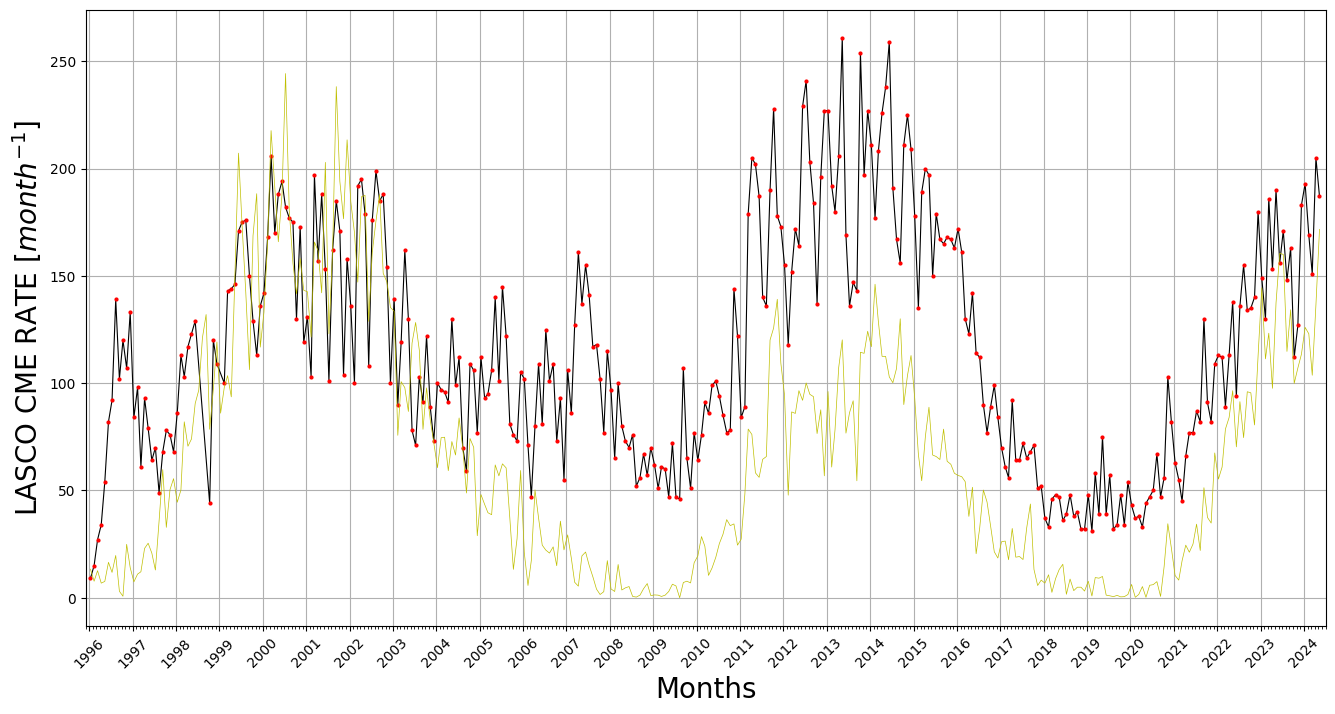

In [206]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(num_date  , num_data, '-o', lw= 0.8, color = 'k', ms = 2, mec = 'r', mfc = 'r')
ax.plot(Year_Month, dSN_m_1996to2024['Monthly total sunspot number'], lw = 0.5, color = 'y')

ax.set_ylabel('LASCO CME RATE [$month^{-1}$]', fontsize=20)
ax.set_xlabel('Months',fontsize=20)

ax.xaxis.set_major_locator(year) 
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(month)

ax.tick_params(axis='x', rotation=45)

ax.set_xlim(IT1, IT2)
#ax.axvline(IB11 , color='r', lw=1, ls= '--')
#ax.axvline(IB12 , color='r', lw=1, ls= '--')

ax.grid()

#plt.savefig('CME_FrequenciaTotal_MonthMean_comSunspot.png', dpi=300, format='png', bbox_inches='tight')

# Statistics

In [188]:
Data_all_2024  = new.loc[(new['Date']>='2024/01/01') & (new['Date']<='2024/05/31')]

In [189]:
Data_all_2024

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
38217,2024/01/01,15:12:09,77,51,286,328,245,0,-14.8*,-------,-------,71,Poor Event; Only C2
38218,2024/01/01,16:36:05,158,66,403,460,341,245,-6.3*,-------,-------,166,
38219,2024/01/01,17:00:05,64,25,243,281,207,0,-8.1*,-------,-------,66,Poor Event; Only C2
38220,2024/01/01,20:12:05,80,55,160,122,195,284,2.7*,-------,-------,68,Poor Event
38221,2024/01/01,23:24:05,244,21,356,404,308,0,-25.8*,-------,-------,236,Very Poor Event; Only C2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024/05/30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,
39118,2024/05/30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event
39119,2024/05/30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event
39120,2024/05/30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,


In [190]:
contagem_CMEs_all = Data_all_2024['Date'].value_counts().sort_index()
contagem_CMEs_all

Date
2024/01/01    5
2024/01/02    6
2024/01/03    6
2024/01/04    3
2024/01/05    4
             ..
2024/05/27    5
2024/05/28    5
2024/05/29    5
2024/05/30    5
2024/05/31    1
Name: count, Length: 151, dtype: int64

In [191]:
contagem_CMEs_all.index
date_num_all = md.datestr2num(contagem_CMEs_all.index)

In [192]:
day    = md.DayLocator(interval = 1)   
month  = md.MonthLocator()  
formatter = md.DateFormatter('%m/%d') #'%H:%M'

IT1 =  md.datestr2num('2023/12/31/00:00:00')
IT2 =  md.datestr2num('2024/06/01/00:00:00')

# Barras verticais 
IB11 = md.datestr2num('2024/05/01/00:00:00')
IB12 = md.datestr2num('2024/05/17/23:00:00')

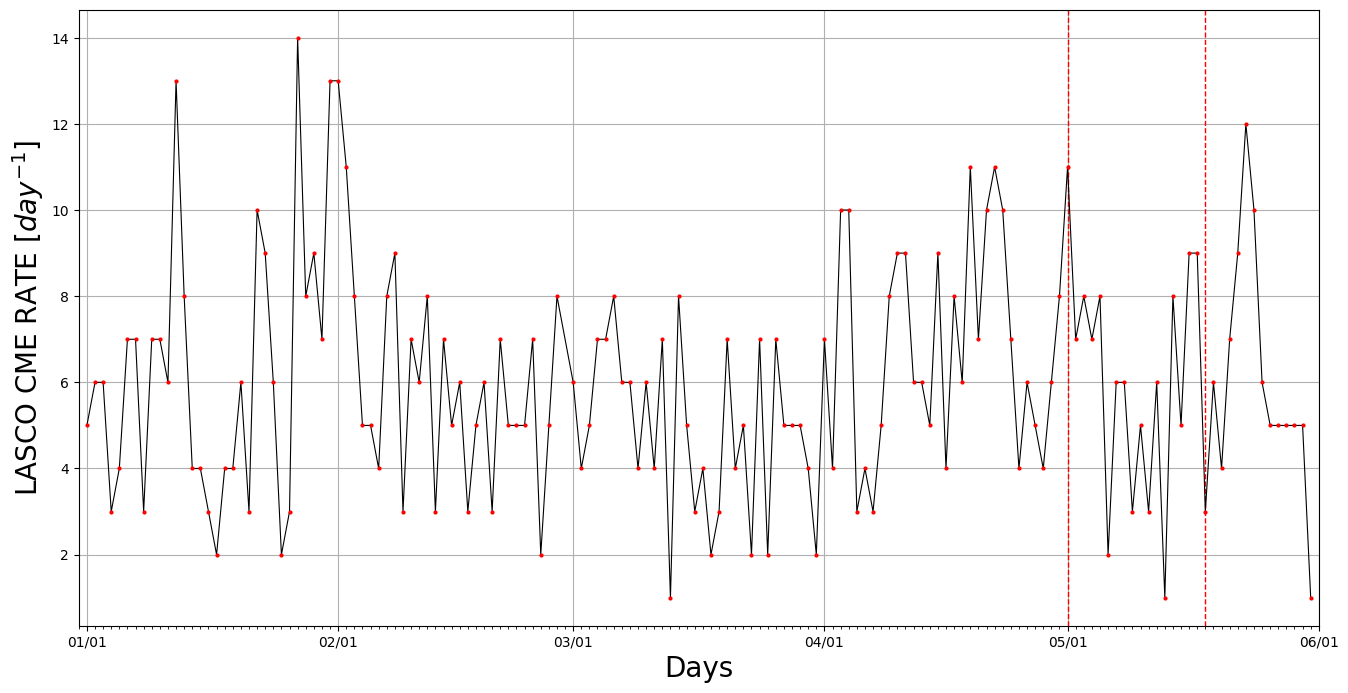

In [193]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(date_num_all , contagem_CMEs_all, '-o', lw= 0.8, color = 'k', ms = 2, mec = 'r', mfc = 'r', zorder= 10)

ax.set_ylabel('LASCO CME RATE [$day^{-1}$]', fontsize=20)
ax.set_xlabel('Days',fontsize=20)

ax.xaxis.set_major_locator(month) 
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(day)

ax.set_xlim(IT1, IT2)
ax.axvline(IB11 , color='r', lw=1, ls= '--')
ax.axvline(IB12 , color='r', lw=1, ls= '--')

ax.grid()

#plt.savefig('CME_FrequenciaTotal_May.png', dpi=300, format='png', bbox_inches='tight')

## 01 to 17 May

In [34]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)

In [35]:
Data_May_2024  = new.loc[(new['Date']>='2024/05/01') & (new['Date']<='2024/05/17')]
Data_May_2024

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
38935,2024/05/01,00:24:05,261,26,229,228,230,234,0.1*,-------,-------,257,Very Poor Event
38936,2024/05/01,00:36:05,216,44,464,662,230,0,-20.8*,-------,-------,217,Poor Event
38937,2024/05/01,02:12:05,167,8,475,692,282,0,-120.1*,-------,-------,169,Poor Event
38938,2024/05/01,04:24:06,10,33,467,478,456,415,-2.3*,-------,-------,16,Poor Event
38939,2024/05/01,06:24:05,278,237,829,846,811,821,-1.7,-------,-------,243,Partial Halo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,2024/05/17,12:48:05,Halo,360,1160,1269,1065,1109,-16.9,-------,-------,298,
39035,2024/05/17,17:00:05,326,43,529,586,471,483,-4.7*,-------,-------,330,Poor Event
39036,2024/05/17,18:48:05,248,43,714,852,561,602,-15.2*,-------,-------,242,
39037,2024/05/17,20:48:05,98,9,573,540,605,897,21.7*,-------,-------,101,Poor Event; Only C2


In [36]:
contagem_CMEs_May = Data_May_2024['Date'].value_counts().sort_index()
contagem_CMEs_May

Date
2024/05/01    11
2024/05/02     7
2024/05/03     8
2024/05/04     7
2024/05/05     8
              ..
2024/05/13     1
2024/05/14     8
2024/05/15     5
2024/05/16     9
2024/05/17     9
Name: count, Length: 17, dtype: int64

In [37]:
contagem_CMEs_May.index
date_num_May = md.datestr2num(contagem_CMEs_May.index)

In [38]:
day    = md.DayLocator(interval=1)   
month  = md.MonthLocator(1)  

formatter = md.DateFormatter('%d') #'%H:%M'

In [39]:
IT1 =  md.datestr2num('2024/04/30/20:00:00')
IT2 =  md.datestr2num('2024/05/17/10:00:00')

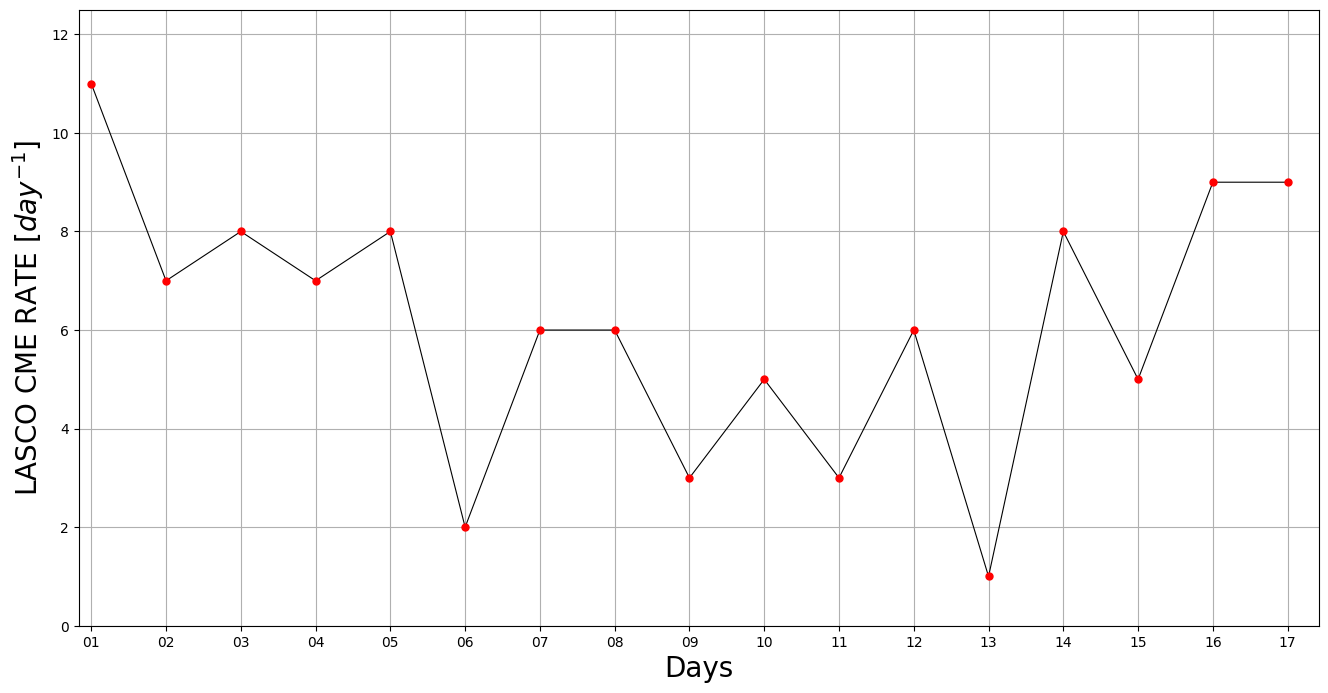

In [40]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(date_num_May , contagem_CMEs_May, '-o', lw=0.8, color= 'k',  ms = 5, mec = 'r', mfc = 'r')

ax.set_ylabel('LASCO CME RATE [$day^{-1}$]', fontsize=20)
ax.set_xlabel('Days',fontsize=20)

ax.xaxis.set_major_locator(day) 
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(IT1, IT2)

ax.set_ylim([0,12.5])

ax.grid()

#plt.savefig('CME_FrequenciaTotal_01to17May.png', dpi=300, format='png', bbox_inches='tight')

### Width

In [41]:
Number_CME = str(len(Data_May_2024))
Number_CME

'104'

In [42]:
Date_May =  Data_May_2024['Date']
Date_May.iloc[0][5:]

'05/01'

In [43]:
width_May = Data_May_2024['Width'].astype(float)
width_May.mean()

116.25

In [44]:
width_May

38935     26.0
38936     44.0
38937      8.0
38938     33.0
38939    237.0
         ...  
39034    360.0
39035     43.0
39036     43.0
39037      9.0
39038    260.0
Name: Width, Length: 104, dtype: float64

In [45]:
widht_mean = int(Data_May_2024["Width"].astype(float).mean())

## Gráfico

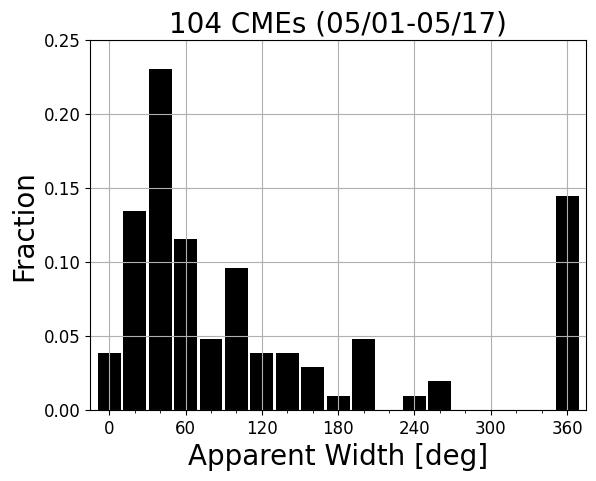

In [46]:
w_bins = np.arange(-10,371, 20)

fig, ax = plt.subplots()

counts_w, bins_w = np.histogram(width_May, bins = w_bins)

ax.hist(bins_w[:-1], bins_w, weights=counts_w/int(Number_CME), align  = 'mid',rwidth= 0.9, color= 'k')

ax.set_xlabel('Apparent Width [deg]', fontsize=20)
ax.set_ylabel('Fraction',fontsize=20)
ax.set_title(Number_CME+' CMEs ('+Date_May.iloc[0][5:]+'-'+Date_May.iloc[-1][5:]+')',fontsize=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(60))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(20))

ax.set_xlim([-15,375])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim([0,0.25])

ax.grid()

plt.show()

### Speed

In [47]:
speed_May = Data_May_2024['Linear Speed'].astype(float)
speed_May

38935     229.0
38936     464.0
38937     475.0
38938     467.0
38939     829.0
          ...  
39034    1160.0
39035     529.0
39036     714.0
39037     573.0
39038    1098.0
Name: Linear Speed, Length: 104, dtype: float64

In [48]:
speed_May.mean()

577.4615384615385

In [49]:
number_of_gt900 = np.size(speed_May[speed_May.gt(900)])

In [50]:
mean_vel_paper = Data_May_2024['Linear Speed'].astype(float).mean()
mean_vel_paper

577.4615384615385

In [51]:
mean_without120 = round( Data_May_2024[Data_May_2024['Width'].astype(float).le(120)]['Width'].astype(float).mean())

## Gráfico 

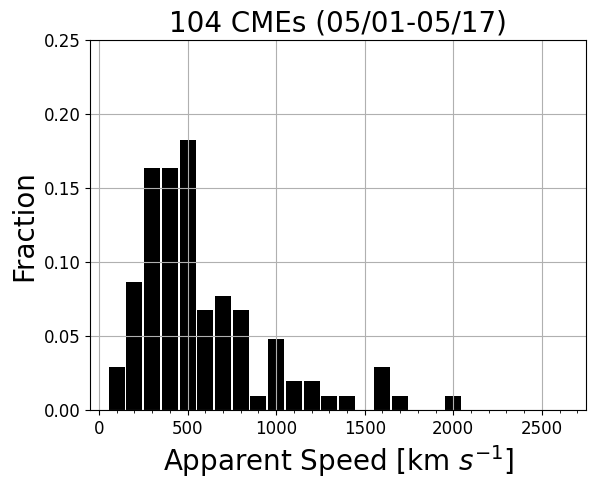

In [52]:
w_bins = np.arange(50,2801, 100)

fig, ax = plt.subplots()

counts_s, bins_s = np.histogram(speed_May, bins = w_bins)

ax.hist(bins_s[:-1], bins_s, weights=counts_s/int(Number_CME), align  = 'mid',rwidth= 0.9, color= 'k')

ax.set_xlabel('Apparent Speed [km $s^{-1}$]', fontsize=20)
ax.set_ylabel('Fraction',fontsize=20)
ax.set_title(Number_CME+' CMEs ('+Date_May.iloc[0][5:]+'-'+Date_May.iloc[-1][5:]+')',fontsize=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))

ax.set_xlim([-50,2750])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim([0,0.25])

ax.grid()

plt.show()

# Todos

In [53]:
Data_May_2024.loc[Data_May_2024['Linear Speed'].astype(float).gt(900) & Data_May_2024['Width'].astype(float).gt(60)]

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
38989,2024/05/08,22:24:05,Halo,360,952,945,959,954,0.7*,-------,-------,213,
38990,2024/05/09,09:24:05,Halo,360,1280,1399,1170,1224,-20.6,-------,-------,207,
38992,2024/05/09,18:52:00,Halo,360,1024,1198,828,343,-73.7*,-------,-------,239,
38994,2024/05/10,07:12:05,Halo,360,953,1013,892,863,-12.3,-------,-------,246,
38998,2024/05/11,01:36:05,Halo,360,1614,1468,1770,1669,28.1,-------,-------,304,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39019,2024/05/15,16:30:05,138,190,1570,1382,1752,1439,78.2*,-------,-------,110,Only C3; Partial Halo
39020,2024/05/15,20:56:53,Halo,360,1355,1558,1149,926,-71.6,-------,-------,278,
39026,2024/05/16,13:36:29,260,258,1102,1196,1005,1055,-13.4,-------,-------,270,Partial Halo
39034,2024/05/17,12:48:05,Halo,360,1160,1269,1065,1109,-16.9,-------,-------,298,


In [54]:
number_of_wideandfast = np.shape(Data_May_2024.loc[Data_May_2024['Linear Speed'].astype(float).gt(900) & Data_May_2024['Width'].astype(float).gt(60)])[0]

In [55]:
n_halo = np.shape( Data_May_2024[ Data_May_2024['Width']=='360'])[0]

In [56]:
n_of_wide = np.shape(Data_May_2024[Data_May_2024['Width'].astype(float).gt(60) ])[0]

### Gráficos

Text(0.93, 0.92, 'b)')

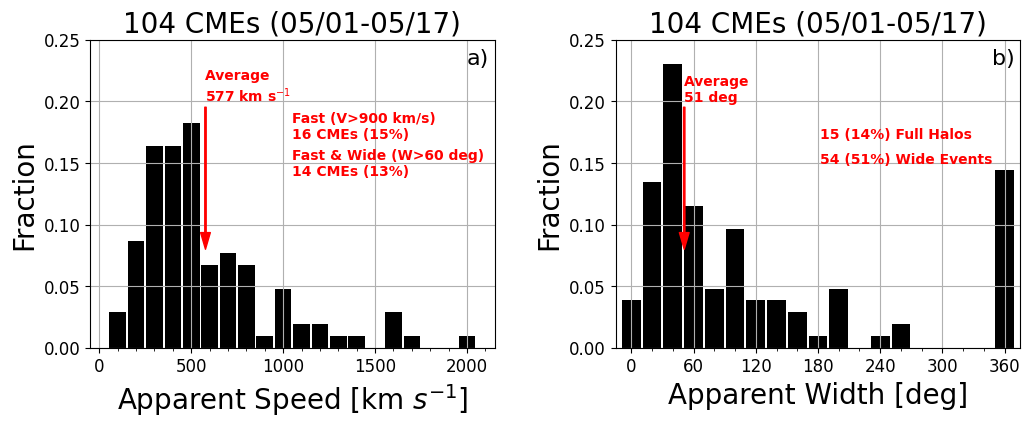

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.subplots_adjust(wspace=0.3)

ax[0].hist(bins_s[:-1], bins_s, weights=counts_s/int(Number_CME), align  = 'mid',rwidth= 0.9, color= 'k')

ax[0].set_xlabel('Apparent Speed [km $s^{-1}$]', fontsize=20)
ax[0].set_ylabel('Fraction',fontsize=20)
ax[0].set_title(Number_CME+' CMEs ('+Date_May.iloc[0][5:]+'-'+Date_May.iloc[-1][5:]+')',fontsize=20)

ax[0].xaxis.set_major_locator(ticker.MultipleLocator(500))
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(100))

ax[0].set_xlim([-50,2150])
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].set_ylim([0,0.25])

#Anotações

ax[1].hist(bins_w[:-1], bins_w, weights=counts_w/int(Number_CME), align  = 'mid',rwidth= 0.9, color= 'k')

ax[1].set_xlabel('Apparent Width [deg]', fontsize=20)
ax[1].set_ylabel('Fraction',fontsize=20)
ax[1].set_title(Number_CME+' CMEs ('+Date_May.iloc[0][5:]+'-'+Date_May.iloc[-1][5:]+')',fontsize=20)

ax[1].xaxis.set_major_locator(ticker.MultipleLocator(60))
ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(20))

ax[1].set_xlim([-15,375])
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_ylim([0,0.25])

for i in range(2):
    ax[i].grid()
 
ax[0].annotate('Fast (V>900 km/s) \n'+str(number_of_gt900)+' CMEs ('+str(int(100*number_of_gt900/int(Number_CME)))+'%)', weight='bold',color = 'red', xy =(1050, 0.17))  
ax[0].annotate('Fast & Wide (W>60 deg) \n'+str(number_of_wideandfast)+' CMEs ('+str(int(100*number_of_wideandfast/int(Number_CME)))+'%)', weight='bold',color = 'red', xy =(1050, 0.14))

ax[0].annotate('Average \n'+str(int(mean_vel_paper))+' km s$^{-1}$',weight='bold',color = 'red', xy =(mean_vel_paper, 0.08), 
               xytext =(mean_vel_paper, 0.2), 
               arrowprops = dict(fc='r', ec='r', headwidth=7, width=1) )

ax[0].annotate('a)', xy=(0.93,0.92), xycoords='axes fraction',size=16)



ax[1].annotate('Average \n'+str(mean_without120)+' deg',weight='bold',color = 'red', xy =(mean_without120, 0.08), 
               xytext =(mean_without120, 0.2), 
               arrowprops = dict(fc='r', ec='r', headwidth=7, width=1) )

ax[1].annotate(str(n_halo)+' ('+str(int(100*n_halo/int(Number_CME)))+'%)'+' Full Halos' , weight='bold',color = 'red', xy =(182, 0.17))  
ax[1].annotate(str(n_of_wide)+' ('+str(int(100*n_of_wide/int(Number_CME)))+'%)'+' Wide Events' , weight='bold',color = 'red', xy =(182, 0.15))

ax[1].annotate('b)', xy=(0.93,0.92), xycoords='axes fraction',size=16)
   
#plt.savefig('CME_paper_May01to17.png', dpi=300, format='png', bbox_inches='tight')

# All

In [58]:
new

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996/01/13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996/01/15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996/01/22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024/05/30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,
39118,2024/05/30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event
39119,2024/05/30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event
39120,2024/05/30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,


### width

In [59]:
width_All = new['Width'].astype(float)
width_All

0         18.0
1         16.0
2         43.0
3         37.0
4         27.0
         ...  
39117     64.0
39118     52.0
39119     55.0
39120    106.0
39121     44.0
Name: Width, Length: 39122, dtype: float64

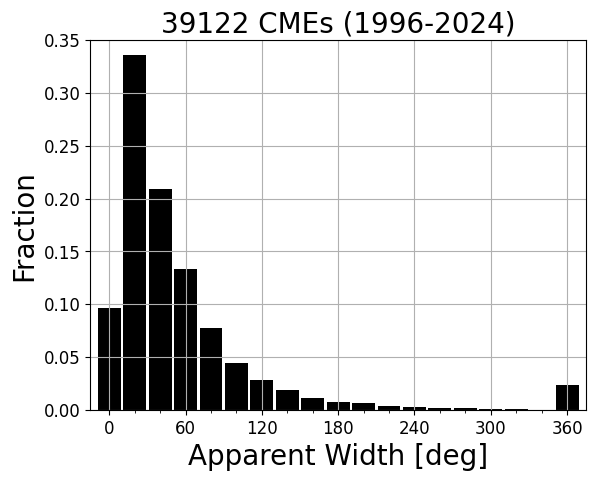

In [60]:
nw_t = np.size(width_All)

w_bins = np.arange(-10,371, 20)

fig, ax = plt.subplots()

counts_w, bins_w = np.histogram(width_All, bins = w_bins)

ax.hist(bins_w[:-1], bins_w, weights=counts_w/nw_t , align  = 'mid',rwidth= 0.9, color= 'k')

ax.set_xlabel('Apparent Width [deg]', fontsize=20)
ax.set_ylabel('Fraction',fontsize=20)
ax.set_title(str(nw_t)+' CMEs (1996-2024)',fontsize=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(60))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(20))

ax.set_xlim([-15,375])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim([0,0.35])

ax.grid()

plt.show()

### Speed

In [61]:
Speed_off = new['Linear Speed'].loc[new['Linear Speed'].str.contains('----')] 
Speed_off

43       ----
45       ----
54       ----
73       ----
155      ----
         ... 
36576    ----
36591    ----
36727    ----
37418    ----
38147    ----
Name: Linear Speed, Length: 119, dtype: object

In [62]:
Speed_on = new['Linear Speed'].loc[new['Linear Speed'].ne(Speed_off)]
Speed_All =  Speed_on.astype(float)

Speed_All

0        499.0
1        290.0
2        525.0
3        267.0
4        262.0
         ...  
39117    665.0
39118    379.0
39119    406.0
39120    458.0
39121    631.0
Name: Linear Speed, Length: 39003, dtype: float64

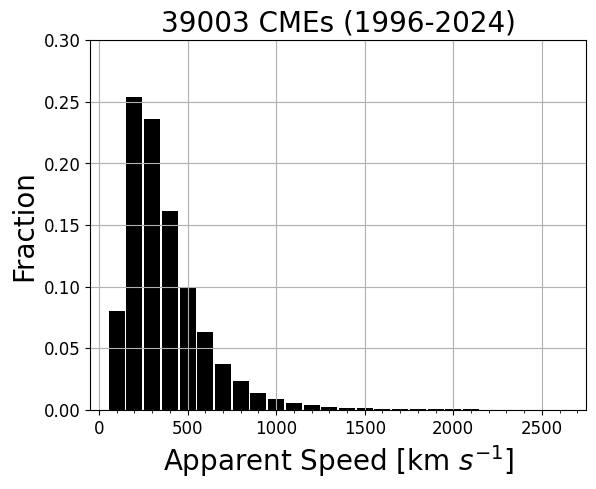

In [63]:
ns_t = np.size(Speed_All)

w_bins = np.arange(50,2801, 100)

fig, ax = plt.subplots()

counts_s, bins_s = np.histogram(Speed_All, bins = w_bins)

ax.hist(bins_s[:-1], bins_s, weights=counts_s/ns_t, align  = 'mid',rwidth= 0.9, color= 'k')

ax.set_xlabel('Apparent Speed [km $s^{-1}$]', fontsize=20)
ax.set_ylabel('Fraction',fontsize=20)
ax.set_title(str(ns_t)+' CMEs (1996-2024)',fontsize=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))

ax.set_xlim([-50,2750])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim([0,0.3])

ax.grid()

plt.show()

## Mesmo plot

### Cálculos

In [64]:
int(Speed_All.mean())

373

In [65]:
int(width_All.mean())

54

In [84]:
mean_without120 = round(Speed_correct[Speed_correct['Width'].astype(float).le(120)]['Width'].astype(float).mean())

In [85]:
n_gt900 = np.size(Speed_All[Speed_All.gt(900)])
n_gt900

1309

In [86]:
Speed_correct = new.loc[new['Linear Speed'].ne(Speed_off)]
Speed_correct

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996/01/13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996/01/15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996/01/22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024/05/30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,
39118,2024/05/30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event
39119,2024/05/30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event
39120,2024/05/30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,


In [87]:
Speed_correct[Speed_correct['Central PA']=='Halo']

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
83,1996/04/29,14:38:48,Halo,360,65,----,----,----,------,-------,-------,149,Faint; Very Poor Event; Only 2 points; Only C2
394,1996/08/16,14:14:06,Halo,360,364,336,390,399,2.0*,5.6e+14*,3.7e+29*,158,
713,1996/11/07,23:20:05,Halo,360,497,366,630,586,8.7,4.2e+15*,5.2e+30*,114,
786,1996/12/02,15:35:05,Halo,360,538,641,430,478,-8.8,1.6e+15*,2.3e+30*,253,
936,1997/01/06,15:10:42,Halo,360,136,51,224,319,4.1,5.8e+14*,5.4e+28*,180,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39048,2024/05/20,05:36:05,Halo,360,1459,1578,1332,1379,-27.1,-------,-------,262,
39103,2024/05/27,07:24:05,Halo,360,1291,1377,1200,1262,-13.7,-------,-------,81,
39106,2024/05/28,05:24:05,Halo,360,675,804,543,632,-10.2,-------,-------,204,
39111,2024/05/29,01:48:05,Halo,360,518,644,378,383,-11.6*,-------,-------,331,Poor Event


In [88]:
n_halo = np.shape(Speed_correct[Speed_correct['Width']=='360'])[0]
Speed_correct[Speed_correct['Width']=='360']

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
83,1996/04/29,14:38:48,Halo,360,65,----,----,----,------,-------,-------,149,Faint; Very Poor Event; Only 2 points; Only C2
394,1996/08/16,14:14:06,Halo,360,364,336,390,399,2.0*,5.6e+14*,3.7e+29*,158,
713,1996/11/07,23:20:05,Halo,360,497,366,630,586,8.7,4.2e+15*,5.2e+30*,114,
786,1996/12/02,15:35:05,Halo,360,538,641,430,478,-8.8,1.6e+15*,2.3e+30*,253,
936,1997/01/06,15:10:42,Halo,360,136,51,224,319,4.1,5.8e+14*,5.4e+28*,180,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39048,2024/05/20,05:36:05,Halo,360,1459,1578,1332,1379,-27.1,-------,-------,262,
39103,2024/05/27,07:24:05,Halo,360,1291,1377,1200,1262,-13.7,-------,-------,81,
39106,2024/05/28,05:24:05,Halo,360,675,804,543,632,-10.2,-------,-------,204,
39111,2024/05/29,01:48:05,Halo,360,518,644,378,383,-11.6*,-------,-------,331,Poor Event


In [89]:
n_of_wideandfast = np.shape(Speed_correct.loc[Speed_correct['Linear Speed'].astype(float).gt(900) & Speed_correct['Width'].astype(float).gt(60)])[0]

In [90]:
n_of_wide = np.shape(Speed_correct.loc[Speed_correct['Width'].astype(float).gt(60)])[0]

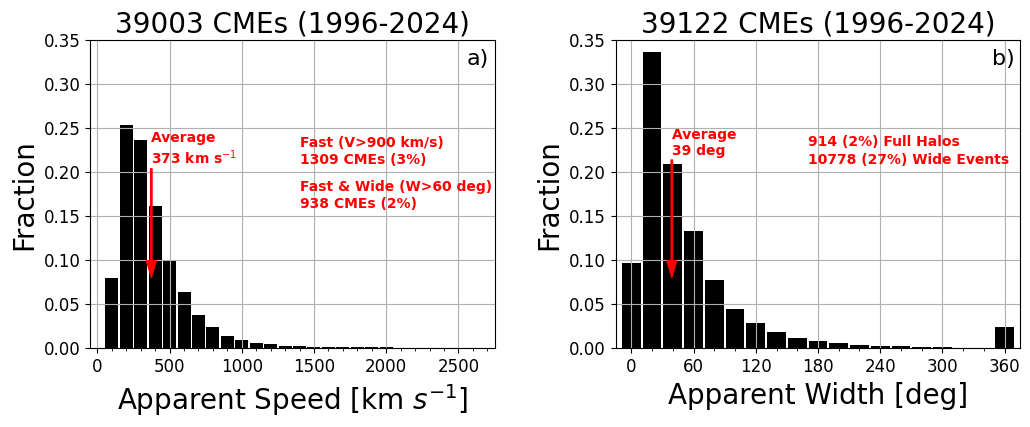

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plt.subplots_adjust(wspace=0.3)

axs[1].hist(bins_w[:-1], bins_w, weights=counts_w/nw_t , align  = 'mid',rwidth= 0.9, color= 'k')

axs[1].set_xlabel('Apparent Width [deg]', fontsize=20)
axs[1].set_ylabel('Fraction',fontsize=20)
axs[1].set_title(str(nw_t)+' CMEs (1996-2024)',fontsize=20)

axs[1].xaxis.set_major_locator(ticker.MultipleLocator(60))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(20))

axs[1].set_xlim([-15,375])
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].set_ylim([0,0.35])

#Anotações
# mean_without120, width_All.mean()
axs[1].annotate('Average \n'+str(int(mean_without120))+' deg',weight='bold',color = 'red', xy =(mean_without120, 0.08), 
               xytext =(mean_without120, 0.22), 
               arrowprops = dict(fc='r', ec='r', headwidth=7, width=1) )

axs[1].annotate(str(n_halo)+' ('+str(int(100*n_halo/nw_t))+'%)'+' Full Halos' , weight='bold',color = 'red', xy =(170, 0.23))  
axs[1].annotate(str(n_of_wide)+' ('+str(int(100*n_of_wide/nw_t))+'%)'+' Wide Events' , weight='bold',color = 'red', xy =(170, 0.21))
axs[1].annotate('b)', xy=(0.93,0.92), xycoords='axes fraction',size=16)
#axs[1].annotate('Fast & Wide (W>60 deg) \n'+str(n_of_wideandfast)+' CMEs ('+str(int(100*n_of_wideandfast/ns_t))+'%)', weight='bold',color = 'red', xy =(1400, 0.16))

# Velocidade 

axs[0].hist(bins_s[:-1], bins_s, weights=counts_s/ns_t, align  = 'mid',rwidth= 0.9, color= 'k')

axs[0].set_xlabel('Apparent Speed [km $s^{-1}$]', fontsize=20)
axs[0].set_ylabel('Fraction',fontsize=20)
axs[0].set_title(str(ns_t)+' CMEs (1996-2024)',fontsize=20)

axs[0].xaxis.set_major_locator(ticker.MultipleLocator(500))
axs[0].xaxis.set_minor_locator(ticker.MultipleLocator(100))

axs[0].set_xlim([-50,2750])
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_ylim([0,0.35])

#Anotações
axs[0].annotate('Fast (V>900 km/s) \n'+str(n_gt900)+' CMEs ('+str(int(100*n_gt900/ns_t))+'%)', weight='bold',color = 'red', xy =(1400, 0.21))  
axs[0].annotate('Fast & Wide (W>60 deg) \n'+str(n_of_wideandfast)+' CMEs ('+str(int(100*n_of_wideandfast/ns_t))+'%)', weight='bold',color = 'red', xy =(1400, 0.16))
axs[0].annotate('a)', xy=(0.93,0.92), xycoords='axes fraction',size=16)

axs[0].annotate('Average \n'+str(int(Speed_All.mean()))+' km s$^{-1}$',weight='bold',color = 'red', xy =(Speed_All.mean(), 0.08), 
               xytext =(Speed_All.mean(), 0.21), 
               arrowprops = dict(fc='r', ec='r', headwidth=7, width=1) )

for i in range(2):
    axs[i].grid()
    
#plt.savefig('CME_results_all.png', dpi=300, format='png', bbox_inches='tight')

# Continuar daqui  

https://www.sidc.be/SILSO/datafiles#total

# Tirar os eventos poor 

In [74]:
new

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499,571,426,0,-64.3*,-------,-------,272,Only C3
1,1996/01/13,22:08:30,265,16,290,278,303,372,2.8*,-------,-------,266,Only C3
2,1996/01/15,07:01:10,262,43,525,600,454,0,-31.1,-------,-------,272,Only C3
3,1996/01/22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262,254,271,322,1.9*,3.0e+14,1.0e+29,90,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39117,2024/05/30,09:12:10,85,64,665,639,691,714,4.2*,-------,-------,100,
39118,2024/05/30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event
39119,2024/05/30,20:12:06,86,55,406,295,513,679,15.9*,-------,-------,82,Very Poor Event
39120,2024/05/30,20:56:54,209,106,458,343,594,530,6.7,-------,-------,203,


In [75]:
new[new['Remarks'].str.startswith('Very Poor Event')]

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
3,1996/01/22,03:11:01,105,37,267,401,130,0,-126.3*,7.1e+13*,2.5e+28*,103,Very Poor Event; Only C3
20,1996/02/17,02:06:31,279,73,317,257,378,532,9.9*,3.3e+14*,1.6e+29*,274,Very Poor Event
21,1996/02/17,05:18:59,86,36,171,64,279,819,27.9*,2.1e+14*,3.1e+28*,88,Very Poor Event; Only 3 points; Only C2
23,1996/02/19,05:15:48,98,30,266,129,403,946,36.7*,1.3e+14*,4.6e+28*,94,Very Poor Event; Only 3 points; Only C2
28,1996/03/06,05:38:36,268,55,175,----,----,----,------,3.6e+13*,5.6e+27*,261,Very Poor Event; Only 2 points; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39108,2024/05/28,20:12:05,355,27,239,249,229,210,-0.7*,-------,-------,7,Very Poor Event
39110,2024/05/28,23:36:06,137,19,279,292,266,155,-2.5*,-------,-------,136,Very Poor Event; Only C2
39114,2024/05/29,13:25:53,190,25,166,152,180,333,3.7*,-------,-------,188,Very Poor Event; Only C2
39118,2024/05/30,14:12:05,239,52,379,368,390,453,3.0*,-------,-------,231,Very Poor Event


### 01 to 17 May

In [76]:
Data_May_2024

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
38935,2024/05/01,00:24:05,261,26,229,228,230,234,0.1*,-------,-------,257,Very Poor Event
38936,2024/05/01,00:36:05,216,44,464,662,230,0,-20.8*,-------,-------,217,Poor Event
38937,2024/05/01,02:12:05,167,8,475,692,282,0,-120.1*,-------,-------,169,Poor Event
38938,2024/05/01,04:24:06,10,33,467,478,456,415,-2.3*,-------,-------,16,Poor Event
38939,2024/05/01,06:24:05,278,237,829,846,811,821,-1.7,-------,-------,243,Partial Halo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,2024/05/17,12:48:05,Halo,360,1160,1269,1065,1109,-16.9,-------,-------,298,
39035,2024/05/17,17:00:05,326,43,529,586,471,483,-4.7*,-------,-------,330,Poor Event
39036,2024/05/17,18:48:05,248,43,714,852,561,602,-15.2*,-------,-------,242,
39037,2024/05/17,20:48:05,98,9,573,540,605,897,21.7*,-------,-------,101,Poor Event; Only C2


In [77]:
Data_May_2024[Data_May_2024['Remarks']=='Very Poor Event']

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
38935,2024/05/01,00:24:05,261,26,229,228,230,234,0.1*,-------,-------,257,Very Poor Event
38949,2024/05/02,11:36:06,17,12,221,339,0,0,-22.8*,-------,-------,15,Very Poor Event
38950,2024/05/02,12:00:05,101,14,275,399,145,0,-23.3*,-------,-------,111,Very Poor Event
38966,2024/05/04,21:38:48,247,34,362,378,346,218,-4.3*,-------,-------,253,Very Poor Event


In [78]:
Data_May_2024[Data_May_2024['Remarks']=='Poor Event']

,Date,Time,Central PA,Width,Linear Speed,I,F,20R,Acel,Mass,KE,MPA,Remarks
38936,2024/05/01,00:36:05,216,44,464,662,230,0,-20.8*,-------,-------,217,Poor Event
38937,2024/05/01,02:12:05,167,8,475,692,282,0,-120.1*,-------,-------,169,Poor Event
38938,2024/05/01,04:24:06,10,33,467,478,456,415,-2.3*,-------,-------,16,Poor Event
38942,2024/05/01,15:48:05,4,29,379,325,436,668,14.1*,-------,-------,14,Poor Event
38944,2024/05/01,19:24:05,262,29,483,280,675,749,21.7*,-------,-------,262,Poor Event
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39022,2024/05/16,04:24:05,262,17,806,759,853,893,9.2*,-------,-------,264,Poor Event
39025,2024/05/16,09:24:05,250,40,434,266,607,587,12.2*,-------,-------,239,Poor Event
39028,2024/05/16,20:56:57,92,18,821,979,669,0,-89.8*,-------,-------,98,Poor Event
39030,2024/05/17,00:00:05,257,49,494,711,235,0,-27.5*,-------,-------,253,Poor Event


### Mass 

In [79]:
#Mass_off = new['Mass'].loc[new['Mass'].str.contains('----') | new['Remarks'].str.contains('Poor Event') ] 
Mass_off = new['Mass'].loc[new['Mass'].str.contains('----') | new['Mass'].str.contains('\*') ] 
Mass_off

0         -------
1         -------
2         -------
3        7.1e+13*
8        2.5e+14*
           ...   
39117     -------
39118     -------
39119     -------
39120     -------
39121     -------
Name: Mass, Length: 18134, dtype: object

In [80]:
Mass_on = new['Mass'].loc[new['Mass'].ne(Mass_off)]
Mass_All =  Mass_on.astype(float)

Mass_All

4        3.000000e+14
5        1.000000e+14
6        4.400000e+13
7        6.300000e+14
9        1.700000e+14
             ...     
37625    1.500000e+15
37627    3.900000e+11
37628    7.400000e+13
37630    2.300000e+15
37631    3.100000e+15
Name: Mass, Length: 20988, dtype: float64

In [81]:
np.linspace(1e13,1e17, 5)

array([1.00000e+13, 2.50075e+16, 5.00050e+16, 7.50025e+16, 1.00000e+17])

NameError: name 'xmajor_formatter' is not defined

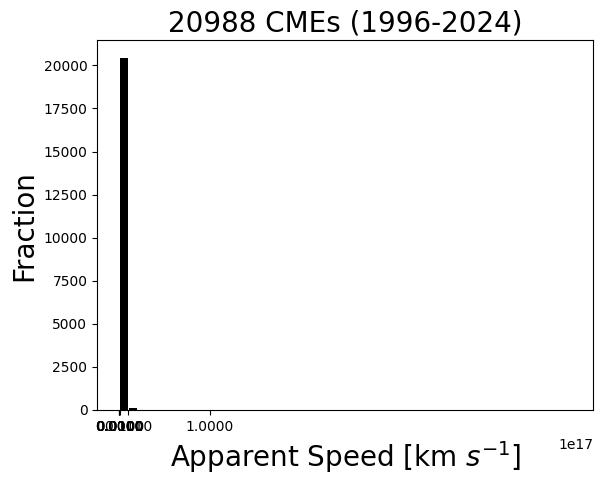

In [82]:
n_t = np.size(Mass_All)

#w_bins = np.arange(1e13,1e16, 0.25e13)
w_bins = np.linspace(5e12,5e17, 51)

fig, ax = plt.subplots()

counts, bins = np.histogram(Mass_All, bins = w_bins)

ax.hist(bins[:-1], bins, weights=counts, align  = 'mid',rwidth= 0.9, color= 'k')

ax.set_xlabel('Apparent Speed [km $s^{-1}$]', fontsize=20)
ax.set_ylabel('Fraction',fontsize=20)
ax.set_title(str(n_t)+' CMEs (1996-2024)',fontsize=20)

ax.xaxis.set_major_locator(ticker.FixedLocator([1e12, 1e13, 1e14, 1e15, 1e16, 1e17]))
#ax.xaxis.set_minor_locator(ticker.LogLocator(subs=(13,17)))

ax.xaxis.set_major_formatter(xmajor_formatter)

#ax.set_xlim([-50,2750])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
#ax.set_ylim([0,0.35])

ax.grid()

plt.show()

In [83]:
counts

array([20441,    79,    12,     2,     2,     0,     2,     0,     0,
           0,     0,     3,     0,     1,     0,     1,     0,     0,
           0,     1,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int64)

### 1996 to 2003

In [ ]:
Data_1996_to_2003  = new.loc[new['Date']<'2004/00/00']
Data_1996_to_2003

In [ ]:
 Data_1996_to_2003.to_csv('data_1996_to_end2003.txt', sep='\t', index=False)

### Width

In [ ]:
Width_1996_to_2003 = Data_1996_to_2003["Width"]
Width_1996_to_2003

In [ ]:
widht_1996to2003 = Width_1996_to_2003.astype(float)
widht_1996to2003

In [ ]:
x = np.arange(0,361, 60)

fig, ax = plt.subplots()

ax.hist(widht_1996to2003, bins = 19, width = 15, align  = 'left',  density = True)

ax.set_xlabel('Apparent Width [deg]', fontsize=15)
ax.set_ylabel('Fraction',fontsize=15)
ax.set_title('ALL CMEs',fontsize=15)

ax.set_xticks(x) 
ax.grid()

plt.show()

### PA

In [ ]:
PA_1996_to_2003 = Data_1996_to_2003["Central PA"]
PA_1996_to_2003[PA_1996_to_2003=='Halo']

In [ ]:
PA_1996_to_2003_NHalo = PA_1996_to_2003.replace('Halo', 0)
PA_1996_to_2003_NHalo

In [ ]:
x = np.arange(0,361, 60)

fig, ax = plt.subplots()

ax.hist(PA_1996_to_2003_NHalo.astype(float), bins = 19, width = 15, align  = 'left',  density = True)

ax.set_xlabel('Central PA [deg]', fontsize=15)
ax.set_ylabel('Fraction',fontsize=15)
ax.set_title('ALL CMEs',fontsize=15)

ax.set_xticks(x) 
ax.grid()

plt.show()

### Apparent Spedd

In [ ]:
Speed_1996_to_2003 = Data_1996_to_2003["Linear Speed"]

In [ ]:
df_remove = Speed_1996_to_2003.loc[(Speed_1996_to_2003  == '----')]
ultimo_df = Speed_1996_to_2003.drop(df_remove.index)

In [ ]:
ultimo_df

In [ ]:
x = np.arange(0,2501, 500)

fig, ax = plt.subplots()

ax.hist(ultimo_df.astype(float), bins = 28 ,align = 'left', width = 70,  density = True)

ax.set_xlabel('Apparent Speed [km/s]', fontsize=15)
ax.set_ylabel('Fraction',fontsize=15)
ax.set_title('ALL CMEs',fontsize=15)

ax.set_xticks(x) 
ax.grid()

plt.show()

In [ ]:
len(bins)

In [ ]:
np.arange(0, len(bins))

In [ ]:
[(bins[x] + bins[x+1])/2  for x in np.arange(0, len(bins)-1)]

In [ ]:
len(np.arange(0,2501, 100))

In [32]:
ultimo_df.astype(float)

NameError: name 'ultimo_df' is not defined

NameError: name 'ultimo_df' is not defined

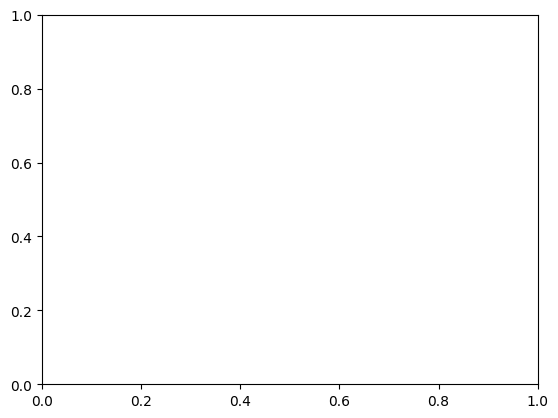

In [33]:
n_bins = np.arange(0,2501, 100)

fig, ax = plt.subplots()

#n_bins = 28

n, bins, patches = ax.hist(ultimo_df.astype(float), bins = n_bins, align = 'mid', width = 70,  density = True)
#n, bins, patches = plt.hist(x, bins=n_bins, edgecolor='black')

ax.set_xlabel('Apparent Speed [km/s]', fontsize=15)
ax.set_ylabel('Fraction',fontsize=15)
ax.set_title('ALL CMEs',fontsize=15)


#ticks = [(bins[x] + bins[x+1])/2  for x in np.arange(0, len(bins)-1)]

#ticklabels = [i for i in range(n_bins)]
#plt.xticks(ticks, ticklabels)

ax.set_xticks([int(x) for x in ticks[0::2]]) 
ax.grid()

plt.show()

In [34]:
bins

array([5.000000e+12, 1.000490e+16, 2.000480e+16, 3.000470e+16,
       4.000460e+16, 5.000450e+16, 6.000440e+16, 7.000430e+16,
       8.000420e+16, 9.000410e+16, 1.000040e+17, 1.100039e+17,
       1.200038e+17, 1.300037e+17, 1.400036e+17, 1.500035e+17,
       1.600034e+17, 1.700033e+17, 1.800032e+17, 1.900031e+17,
       2.000030e+17, 2.100029e+17, 2.200028e+17, 2.300027e+17,
       2.400026e+17, 2.500025e+17, 2.600024e+17, 2.700023e+17,
       2.800022e+17, 2.900021e+17, 3.000020e+17, 3.100019e+17,
       3.200018e+17, 3.300017e+17, 3.400016e+17, 3.500015e+17,
       3.600014e+17, 3.700013e+17, 3.800012e+17, 3.900011e+17,
       4.000010e+17, 4.100009e+17, 4.200008e+17, 4.300007e+17,
       4.400006e+17, 4.500005e+17, 4.600004e+17, 4.700003e+17,
       4.800002e+17, 4.900001e+17, 5.000000e+17])

In [35]:
n

NameError: name 'n' is not defined

In [36]:
bins

array([5.000000e+12, 1.000490e+16, 2.000480e+16, 3.000470e+16,
       4.000460e+16, 5.000450e+16, 6.000440e+16, 7.000430e+16,
       8.000420e+16, 9.000410e+16, 1.000040e+17, 1.100039e+17,
       1.200038e+17, 1.300037e+17, 1.400036e+17, 1.500035e+17,
       1.600034e+17, 1.700033e+17, 1.800032e+17, 1.900031e+17,
       2.000030e+17, 2.100029e+17, 2.200028e+17, 2.300027e+17,
       2.400026e+17, 2.500025e+17, 2.600024e+17, 2.700023e+17,
       2.800022e+17, 2.900021e+17, 3.000020e+17, 3.100019e+17,
       3.200018e+17, 3.300017e+17, 3.400016e+17, 3.500015e+17,
       3.600014e+17, 3.700013e+17, 3.800012e+17, 3.900011e+17,
       4.000010e+17, 4.100009e+17, 4.200008e+17, 4.300007e+17,
       4.400006e+17, 4.500005e+17, 4.600004e+17, 4.700003e+17,
       4.800002e+17, 4.900001e+17, 5.000000e+17])

NameError: name 'n' is not defined

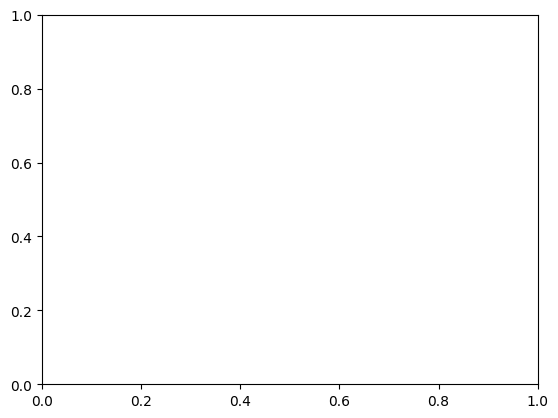

In [37]:
fig, ax = plt.subplots()

ax.bar(bins[:-1], n)